In [118]:
import pandas as pd
import numpy as np
import seaborn as sns

raw_welfare = pd.read_spss("../data/Koweps_hpwc14_2019_beta2.sav")

welfare = raw_welfare.copy()

In [119]:
welfare = welfare.rename(
    columns={
        "h14_g3": "sex",
        "h14_g4": "birth",
        "h14_g10": "marriage_type",
        "h14_g11": "religion",
        "p1402_8aq1": "income",
        "h14_eco9": "code_job",
        "h14_reg7": "code_region",
    }
)

# 성별

In [120]:
welfare["sex"].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [121]:
# 이상치 처리
welfare["sex"] = np.where(welfare["sex"] == 9, np.nan, welfare["sex"])

# 결측치 확인
welfare["sex"].isna().sum()

0

In [122]:
# 성별 항목 이름 부여
welfare["sex"] = np.where(welfare["sex"] == 1, "male", "female")

# 빈도 구하기
welfare["sex"].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

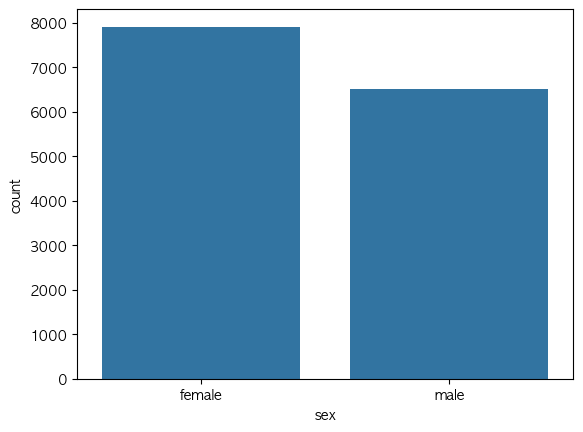

In [123]:
sns.countplot(data=welfare, x="sex")

# 월급

In [124]:
welfare["income"].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

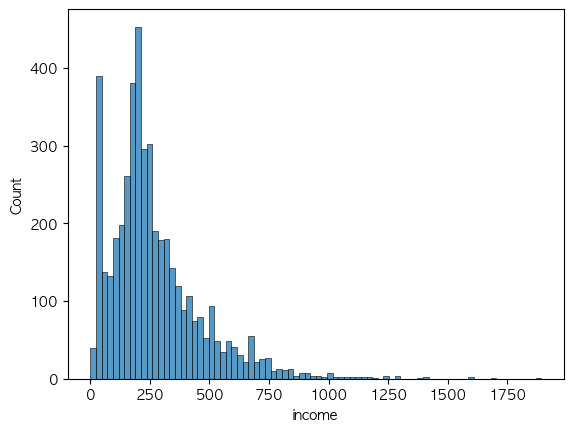

In [125]:
sns.histplot(
    data=welfare,
    x="income",
)

In [126]:
# 결측치 확인
welfare["income"].isna().sum()

9884

In [127]:
# 이상치 결측 처리
welfare["income"] = np.where(welfare["income"] == 9999, np.nan, welfare["income"])

welfare["income"].isna().sum()

9884

In [128]:
sex_income = (
    welfare.dropna(subset="income")
    .groupby("sex", as_index=False)
    .agg(mean_income=("income", "mean"))
)

sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

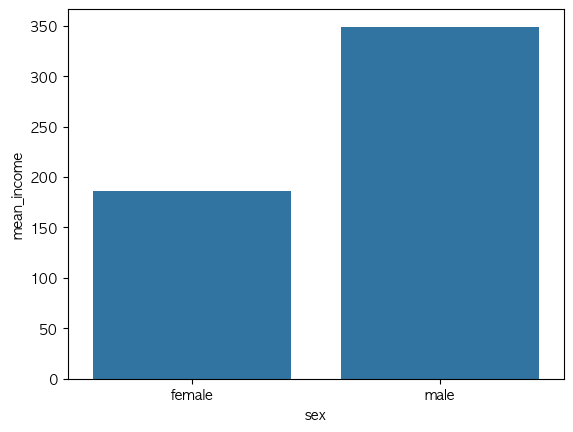

In [129]:
sns.barplot(data=sex_income, x="sex", y="mean_income")

# 나이와 월급의 관계

In [130]:
welfare["birth"].dtypes

dtype('float64')

<Axes: xlabel='birth', ylabel='Count'>

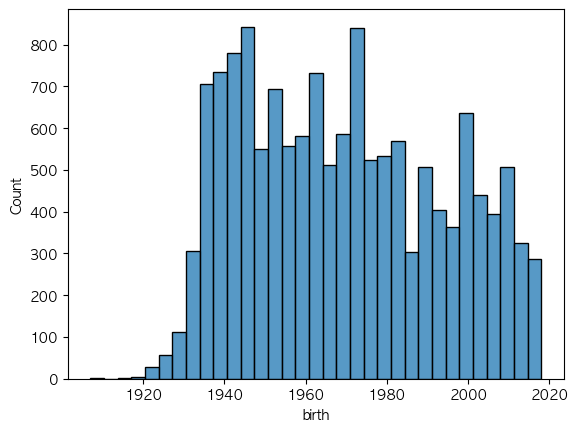

In [131]:
sns.histplot(data=welfare, x="birth")

In [132]:
welfare["birth"].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [133]:
welfare["birth"].isna().sum()

0

In [134]:
welfare = welfare.assign(age=2019 - welfare["birth"] + 1)
welfare["age"].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

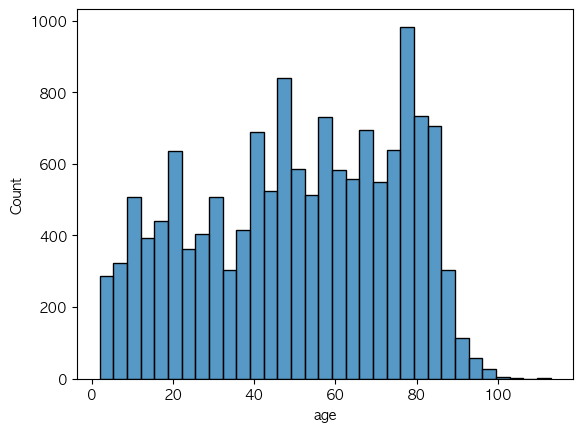

In [135]:
sns.histplot(data=welfare, x="age")

In [136]:
age_income = (
    welfare.dropna(subset="income").groupby("age").agg(mean_income=("income", "mean"))
)
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

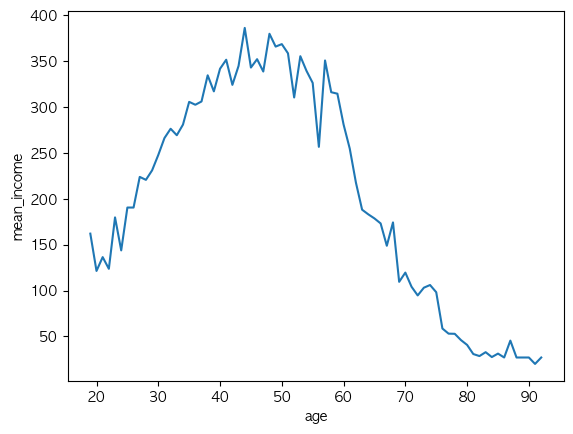

In [137]:
sns.lineplot(data=age_income, x="age", y="mean_income")

In [138]:
welfare["age"].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [139]:
welfare = welfare.assign(
    ageg=np.where(
        welfare["age"] < 30, "young", np.where(welfare["age"] <= 59, "middle", "old")
    )
)

welfare["ageg"].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

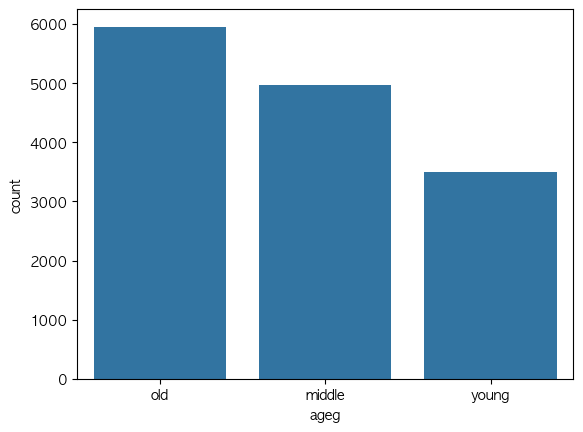

In [140]:
sns.countplot(data=welfare, x="ageg")

In [141]:
# as_index : 그룹화할 내용을 인덱스로 할지 여부입니다. False이면 기존 인덱스가 유지됩니다.
ageg_income = (
    welfare.dropna(subset=["income"])
    .groupby("ageg", as_index=False)
    .agg(mean_income=("income", "mean"))
)

ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

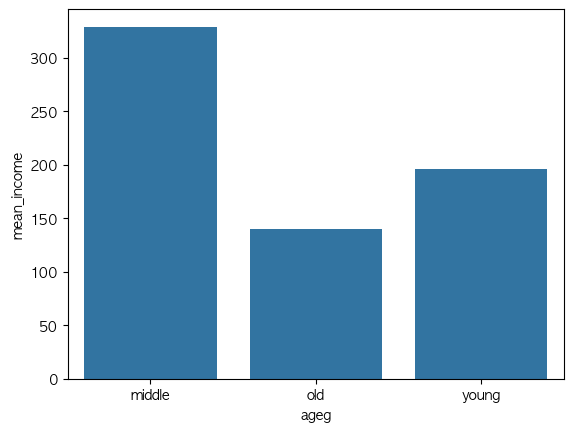

In [142]:
sns.barplot(data=ageg_income, x="ageg", y="mean_income")

     ageg  mean_income
0  middle   329.157157
1     old   140.129003
2   young   195.663424


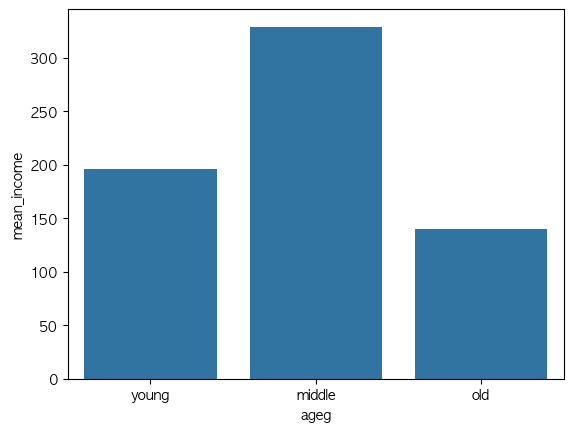

In [143]:
sns.barplot(
    data=ageg_income,
    x="ageg",
    y="mean_income",
    order=["young", "middle", "old"],
)

print(ageg_income)

In [144]:
sex_income = (
    welfare.dropna(subset="income")
    .groupby(["ageg", "sex"], as_index=False)
    .agg(mean_income=("income", "mean"))
)
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

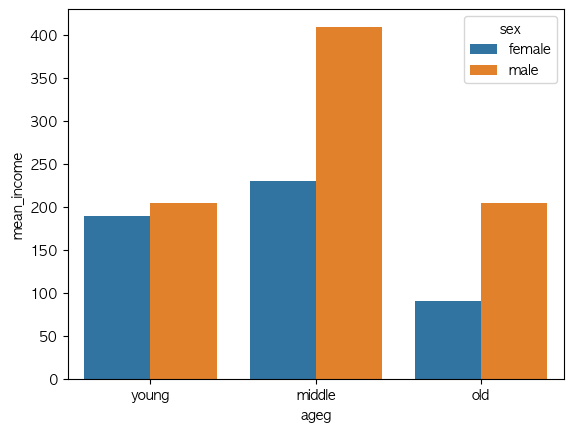

In [145]:
sns.barplot(
    data=sex_income,
    x="ageg",
    y="mean_income",
    hue="sex",
    order=["young", "middle", "old"],
)

In [146]:
sex_age = (
    welfare.dropna(subset="income")
    .groupby(["age", "sex"], as_index=False)
    .agg(mean_income=("income", "mean"))
)
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

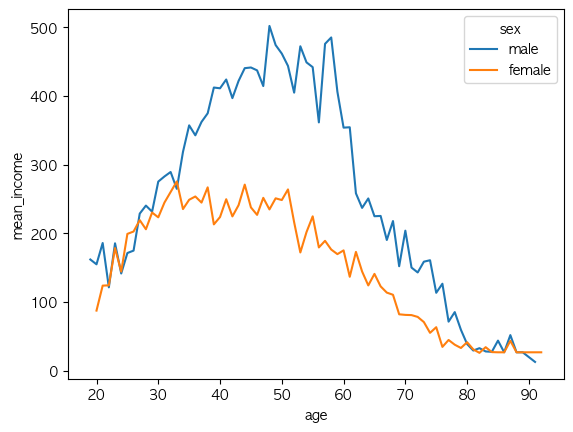

In [147]:
sns.lineplot(data=sex_age, x="age", y="mean_income", hue="sex")

In [148]:
welfare["code_job"].dtypes

dtype('float64')

In [149]:
welfare["code_job"].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [150]:
list_job = pd.read_excel("../data/Koweps_Codebook_2019.xlsx", sheet_name="직종코드")
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [151]:
list_job.shape

(156, 2)

In [152]:
welfare = welfare.merge(list_job, how="left", on="code_job")

In [153]:
# code_job 결측치 제거 하고 code_job, job 출력
welfare.dropna(subset=["code_job"])[["code_job", "job"]].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [154]:
# 직업별 월급 평균표 만들기
job_income = (
    welfare.dropna(subset=["job", "income"])
    .groupby("job", as_index=False)
    .agg(mean_income=("income", "mean"))
)
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [155]:
# 월급이 많은 직업

top10 = job_income.sort_values(by="mean_income", ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='mean_income', ylabel='job'>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


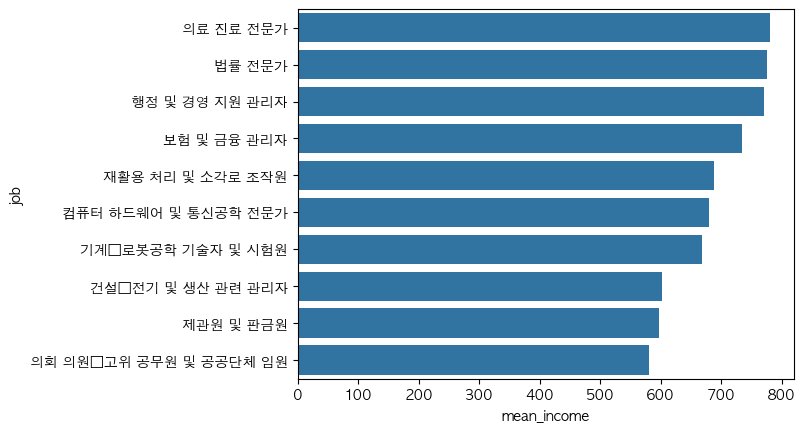

In [156]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.family": "AppleGothic"})

# 막대 그래프 만들기
sns.barplot(data=top10, x="mean_income", y="job")

In [157]:
# 월급이 적은 직업
# 하위 10
bottom10 = job_income.sort_values(by="mean_income").head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


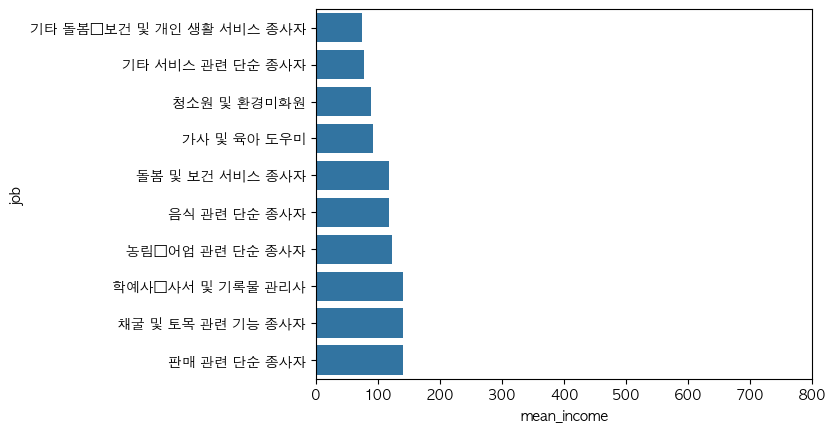

In [158]:
# 막대 그래프
# 상위 10과 비교할 수 있게 x축을 [0,800]으로 제한을 시킨다.
sns.barplot(data=bottom10, x="mean_income", y="job").set(xlim=[0, 800])

In [159]:
# 성별 직업 빈도표 만들기
# 남성 직업 빈도 상위 10개 추출

job_male = (
    welfare.dropna(subset=["job"])
    .query('sex == "male"')
    .groupby("job", as_index=False)
    .agg(n=("job", "count"))
    .sort_values("n", ascending=False)
    .head(10)
)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [160]:
job_female = (
    welfare.dropna(subset="job")
    .query('sex == "female"')
    .groupby("job", as_index=False)
    .agg(n=("job", "count"))
    .sort_values("n", ascending=False)
    .head(10)
)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

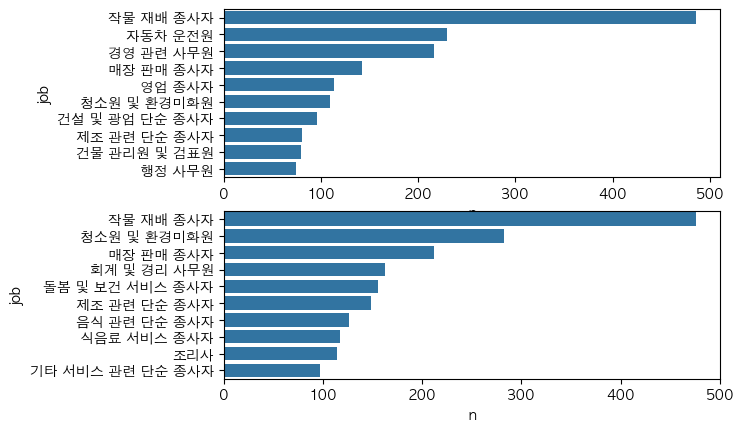

In [161]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

sns.barplot(data=job_male, x="n", y="job", ax=ax1)

sns.barplot(data=job_female, x="n", y="job", ax=ax2).set(xlim=[0, 500])

[(0.0, 500.0)]

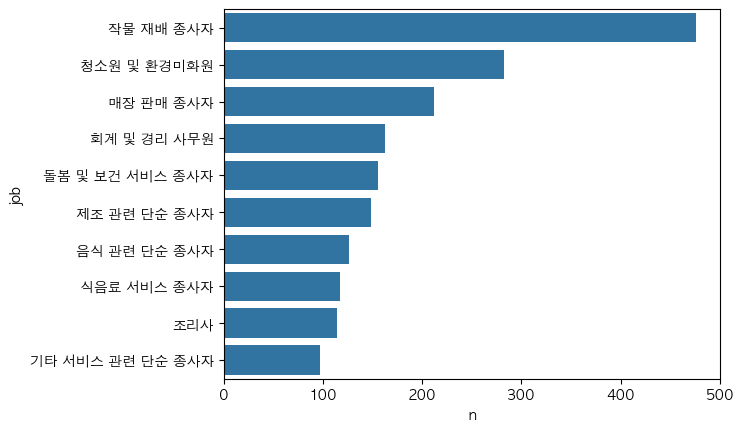

In [162]:
sns.barplot(data=job_female, x="n", y="job").set(xlim=[0, 500])

In [163]:
# 종교가 있으면 이혼을 덜 할까?
welfare["religion"].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [164]:
# 종교 유무 이름 부여
welfare["religion"] = np.where(welfare["religion"] == 1, "yes", "no")

# 빈도 구하기
welfare["religion"].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

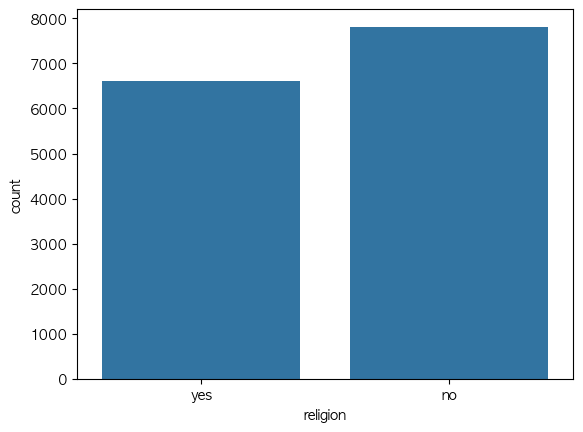

In [165]:
sns.countplot(data=welfare, x="religion")

In [166]:
print(welfare["marriage_type"].dtypes)
print(welfare["marriage_type"].value_counts())

float64
marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64


In [167]:
# 이혼 여부 변수 만들기
welfare["marriage"] = np.where(
    welfare["marriage_type"] == 1,
    "marriage",
    np.where(welfare["marriage_type"] == 3, "divorce", "etc"),
)

In [168]:
n_divorce = welfare.groupby("marriage", as_index=False).agg(n=("marriage", "count"))

n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

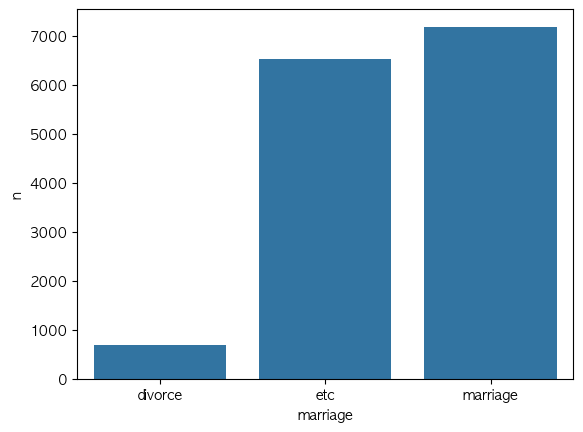

In [171]:
sns.barplot(data=n_divorce, x="marriage", y="n")

In [ ]:
# 종교 유무에 따른 이혼율 분석하기

In [173]:
rel_div = (
    welfare.query('marriage != "etc"')
    .groupby("religion", as_index=False)["marriage"]
    .value_counts(normalize=True)
)

rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [174]:
rel_div = (
    rel_div.query('marriage =="divorce"')
    .assign(proportion=rel_div["proportion"] * 100)
    .round(1)
)

rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

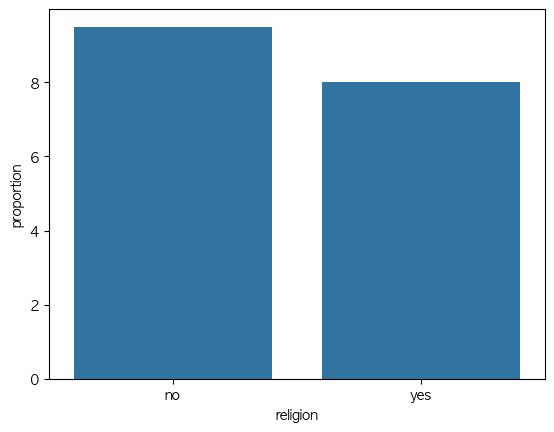

In [175]:
sns.barplot(data=rel_div, x="religion", y="proportion")